# EPS FALL 2024 CA1
## Ali Chegini 
### SID: 810801064

Q1:

function down below will get hypergeometric paramters and then return a numpy array of hypergeometric samples

In [1]:
import numpy as np
import scipy.stats as stats

def get_hypergeo_samples(N, k, m):
    random_var = np.random.hypergeometric(k, N-k, m)
    return random_var    

generating a smaple of size $n = 150$ of random variables of hypergeo distrobutation and then getting their pmf into pmf_results numpy array and then pmf graph is plotted

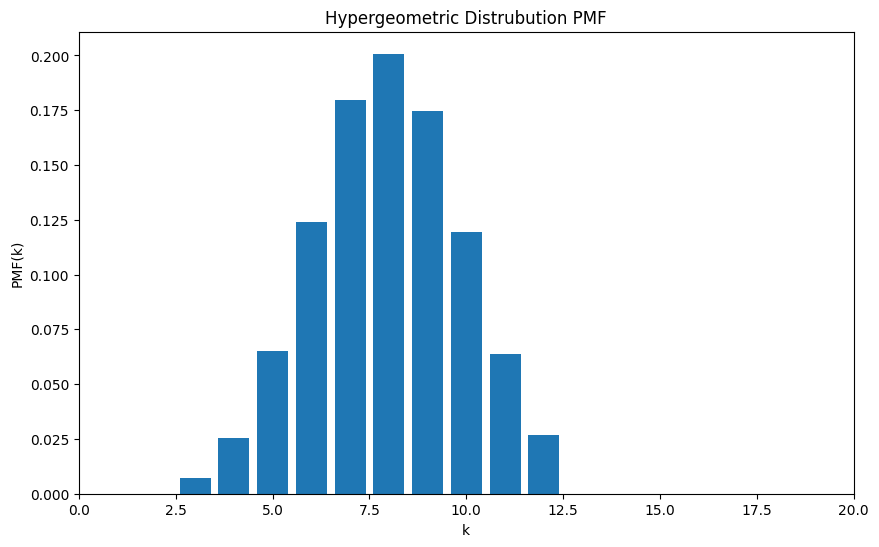

In [2]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
N = 100   #total population
k = 20    #prefered outcomes
m = 40    #sample size
sample_size = 150  #number of samples to generate

samples = np.random.hypergeometric(k, N - k, m, 150)
pmf_results = hypergeom.pmf(samples, N, k, m)

plt.figure(figsize=(10, 6))
plt.xlim(0, 20)
plt.bar(samples, pmf_results)
plt.title("Hypergeometric Distrubution PMF")
plt.xlabel("k")
plt.ylabel("PMF(k)")

plt.show()


for X to be a random variable with hypergeometric distrubation , expectation and variance is calculated mathematiclly with 
$$
\begin{align*}
E[X] = m \cdot \frac{k}{N} \\ 
var(X) = \frac{m \cdot k \cdot (N - k)}{N^2} \cdot \frac{N - m}{N - 1}
\end{align*}
$$

In [3]:
def theoretical_mean_variance(N, k, m):
    mean = m * (k / N)
    variance = m * (k / N) * ((N - k) / N) * ((N - m) / (N - 1))
    return mean , variance

In [4]:
theretical_mean , theoretical_variance = theoretical_mean_variance(N, k, m)
print(theretical_mean, theoretical_variance)

8.0 3.878787878787879


`so theoretical mean and var is found above:
$$
E[X] = 8 
\\
var(X) \approx 3.88
$$
`

In [5]:
def empirical_mean_variance(N, k, m):
    sample_sizes = np.arange(100, 10001, 50)
    empirical_mean = []
    empirical_variance = []

    for n in sample_sizes:
        samples = np.random.hypergeometric(k, N - k, m, n)
        empirical_mean.append(np.mean(samples))
        empirical_variance.append(np.var(samples))
    return empirical_mean, empirical_variance

plots of mean and variance based on theoreticall calculatoin and empirical results with different number of smaples from 100 to 10000 with 50 increments

[np.float64(8.01), np.float64(7.993333333333333), np.float64(8.085), np.float64(7.844), np.float64(8.026666666666667), np.float64(7.9), np.float64(8.15), np.float64(7.986666666666666), np.float64(7.986), np.float64(8.076363636363636), np.float64(7.998333333333333), np.float64(7.984615384615385), np.float64(7.904285714285714), np.float64(8.130666666666666), np.float64(8.00875), np.float64(7.909411764705882), np.float64(7.9511111111111115), np.float64(7.923157894736842), np.float64(8.093), np.float64(8.085714285714285), np.float64(8.059090909090909), np.float64(8.070434782608695), np.float64(8.098333333333333), np.float64(8.0592), np.float64(7.945384615384615), np.float64(7.99037037037037), np.float64(8.067857142857143), np.float64(8.015862068965518), np.float64(8.054), np.float64(7.978709677419355), np.float64(8.0225), np.float64(7.996363636363636), np.float64(8.100588235294119), np.float64(8.071428571428571), np.float64(8.019444444444444), np.float64(7.984324324324325), np.float64(7.94

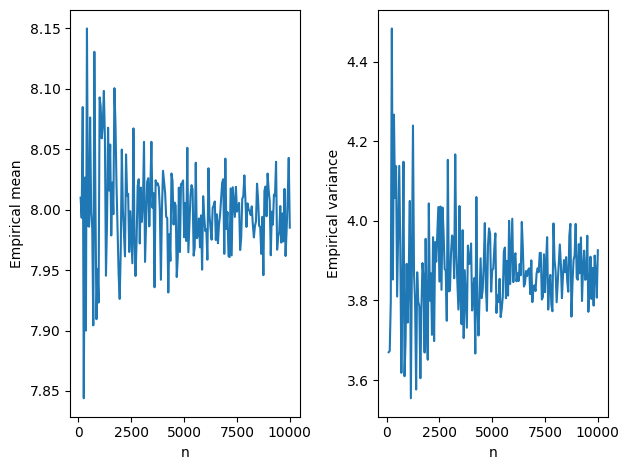

In [6]:
sample_sizes = np.arange(100, 10001, 50)
empirical_mean, empirical_variance = empirical_mean_variance(N, k, m)
print(empirical_mean)
print(empirical_variance)



plt.subplot(1, 2, 1)
plt.plot(sample_sizes, empirical_mean)
plt.xlabel("n")
plt.ylabel("Empirical mean")

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, empirical_variance)
plt.xlabel("n")
plt.ylabel("Empirical variance")

plt.tight_layout()
plt.show()

as it can be seen from both empirical  mean and empirical variance  as n (the number of samples)approaches a bigger number results get closer to the theoretical resutls which is $E[x] = 8 , var(x) \approx 3.87$

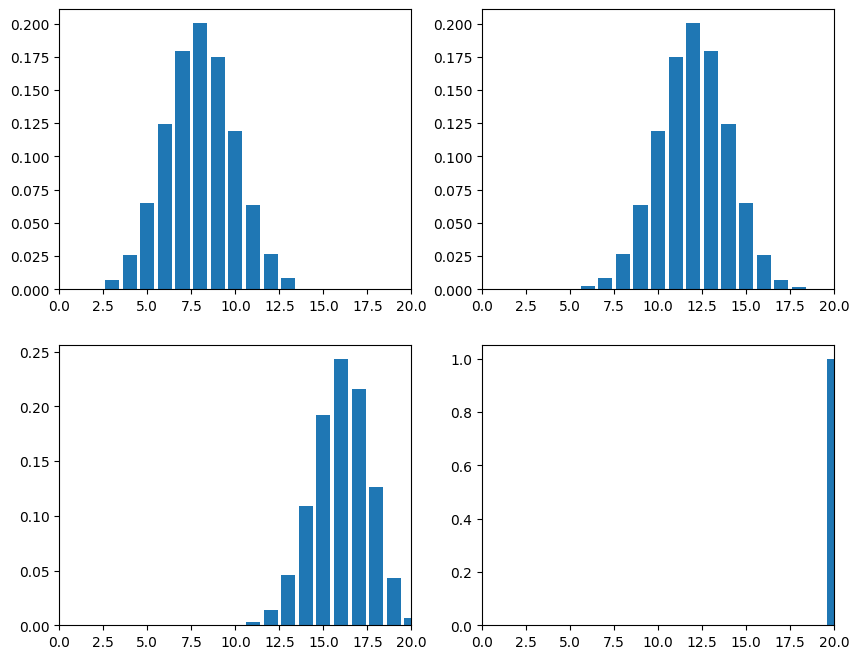

In [7]:
const_sample_size = 1000
m_values = [40, 60, 80, 100]

plt.figure(figsize=(10, 8))
index = 1
for m_value in m_values:
    samples = np.random.hypergeometric(k, N - k, m_value, const_sample_size)
    pmf_of_samples = hypergeom.pmf(samples, N, k, m_value)
    plt.subplot(2, 2, index)
    plt.xlim(0, 20)
    plt.bar(samples, pmf_of_samples)
    index += 1

in this part we can clearly understand that if m which is the number of samples out of 100 gets bigger, expectation of districts with fraud election process also gets bigger till we reach $m = 100$ and then pmf graph has only one value in one point and that is $P(X = 20) = 1$

---------------------------

in the cell below 2 functions have been defined , the first one calculates pmf of a random variable with hypergeometric distro and the other for bionomial distro

In [8]:
import math

def calculate_hypergeo_pmf(possible_values, N, k, m):

    hypergeo_pmf = []
    for possible_value in possible_values:
        if possible_value <= min(m, k) and possible_value >= max(0, m - N + k):
            hypergeo_pmf.append(math.comb(k, possible_value) * math.comb(N - k, m - possible_value)/math.comb(N, m))
        else:
            hypergeo_pmf.append(0)
    return hypergeo_pmf

def calculate_bin_pmf(possible_values, m, p):
    bin_pmf = []
    for possible_value in possible_values:
        if possible_value >= 0:
            bin_pmf.append(math.comb(m, possible_value) * (p ** possible_value) * ((1-p) ** (m - possible_value)))
        else:
            bin_pmf.append(0)
    return bin_pmf


knowing that in case of fixing $p = k / N $ and then in case of $\lim_{N \to \infty} N$ then bionomial and hypergeometric distrubution proved to be the same mathematically

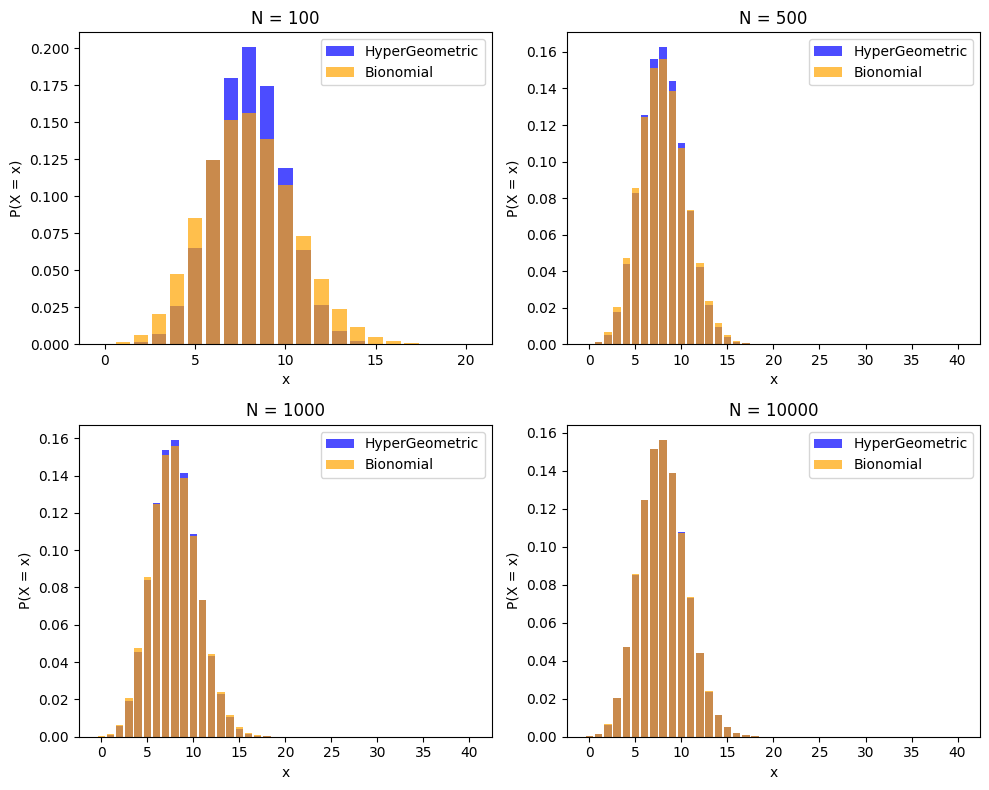

In [9]:
import matplotlib.pyplot as plt
N_values = [100, 500, 1000, 10000]
k_values = [20, 100, 200, 2000]
m = 40

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i in range(4):
    N = N_values[i]
    k = k_values[i]
    samples = np.arange(0, min(k, m) + 1)
    p = k / N
    hypergeo_pmf = calculate_hypergeo_pmf(samples, N, k, m)
    bin_pmf = calculate_bin_pmf(samples, m, p)
    axs[i].bar(samples, hypergeo_pmf, alpha = 0.7, label='HyperGeometric', color='blue')
    axs[i].bar(samples, bin_pmf, alpha = 0.7, label='Bionomial', color='orange')

    axs[i].set_title(f"N = {N}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("P(X = x)")
    axs[i].legend()
    
plt.tight_layout()
plt.show()



as it is visualized in the plots above, one can see that as N appraoches a bigger number, Hypergeometric PMF plot and bionomial PMF plot are converging in shape.


Q2: 

let X be the number of poeple that will respond back to attend the meeting
$$X \sim \text {Bin(1000, 0.45)}$$
to calculate CDF funciton using PMF that was Defined before: 
$$F_X(430) = P(1) + P(2) + ... + P(430)$$

In [10]:
def calculate_bin_cdf(X, n, p):
    possible_outcomes = np.arange(0, n + 1)
    pmf_results = calculate_bin_pmf(possible_outcomes, n, p)
    cdf_result = sum(pmf_results[:X + 1])
    return cdf_result    

In [11]:
X = 430
n = 1000
p = 0.45
cdf_result = calculate_bin_cdf(X, n, p)
print("probability that 430 participants at max would attend the event: ")
print(cdf_result)

probability that 430 participants at max would attend the event: 
0.10746379727837699


X can be approximated using Y which is a Normal random variable
$$E[Y] = n p $$
$$var(Y) = np(1-p)$$
$$Y \sim \text {Normal(450, 247.5)}$$

In [12]:
from scipy.stats import norm
mean = n * p
std_dev = math.sqrt(n * p * (1 - p))
normal_cdf_result = norm.cdf(X, loc = mean, scale = std_dev)

print("the same probability calculated with Normal CDF: ")
print(normal_cdf_result)
print("Error margin using Normal CDF without continuity correction ")
absolute_difference = abs(normal_cdf_result - cdf_result)
print(absolute_difference)

the same probability calculated with Normal CDF: 
0.10181391354680291
Error margin using Normal CDF without continuity correction 
0.0056498837315740735


continuity correction : 
$$P(X <= 430) = P(Y < 430.5) = F_Y(430.5)$$

In [13]:
corrected_normal_cdf = norm.cdf(X + 0.5, loc = mean, scale = std_dev)
absolute_difference = abs(corrected_normal_cdf - cdf_result)

print("CDF result after continuity correction: ")
print(corrected_normal_cdf)
print(f"Error margin using Normal CDF with continuity correction:\n{absolute_difference}")


CDF result after continuity correction: 
0.10757994159809581
Error margin using Normal CDF with continuity correction:
0.00011614431971881944


***
computing CDF for $X = 1, 2, ... , 1000$ with every 3 methods above and then compare their error margines.  
Two functions down below is defined to compute CDFs for every X possilbe in $ X = 0, 1, 2, ... 1000$ and then the last function calculates the error between bionomial to normal without continuety correction and with continuty correctoin and then returns two numpy array that each element is error between two normal methods with bionomial

In [14]:
from scipy.stats import binom

def calculate_bin_cdfs(X_values, n, p):
    bin_cdfs = []
    for X in X_values:     
        bin_cdfs.append(calculate_bin_cdf(X, n, p))
    return bin_cdfs


def calculate_normal_cdfs(X_values, mean, std_dev):
    normal_CDFs = []
    corrected_normal_CDFs = []
    for X in X_values:
        continuty_correct_X = X + 0.5 
        normal_CDFs.append(norm.cdf(X, loc = mean, scale = std_dev))
        corrected_normal_CDFs.append(norm.cdf(continuty_correct_X, loc = mean, scale = std_dev))
    return normal_CDFs, corrected_normal_CDFs

def calculate_approx_error(bionomial_CDFs, normal_CDFs, corrected_normal_CDFs):
    bionomial_to_nomral_error = np.abs(np.array(bionomial_CDFs) - np.array(normal_CDFs))
    bionomial_to_corrected_normal_error = np.abs(np.array(bionomial_CDFs) - np.array(corrected_normal_CDFs))
    return bionomial_to_nomral_error, bionomial_to_corrected_normal_error




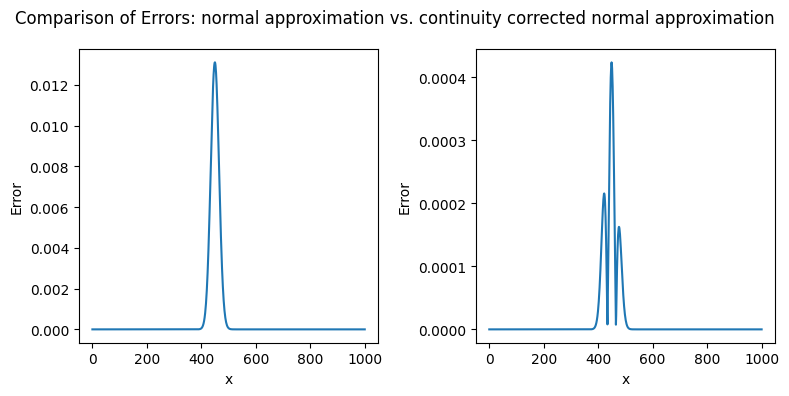

In [15]:
X_values = np.arange(0, n + 1)

mean = n * p
std_dev = math.sqrt(n * p * (1 - p))

bionomial_CDFs = calculate_bin_cdfs(X_values, n, p)
normal_CDFs , corrected_normal_CDFs = calculate_normal_cdfs(X_values, mean , std_dev)

bionomial_to_normal_error, bionomial_to_corrected_normal_error = calculate_approx_error(bionomial_CDFs, normal_CDFs, corrected_normal_CDFs)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs = axs.flatten()
plt.suptitle("Comparison of Errors: normal approximation vs. continuity corrected normal approximation")

axs[0].plot(X_values, bionomial_to_normal_error)
axs[0].set_xlabel("x")
axs[0].set_ylabel("Error")
axs[1].plot(X_values, bionomial_to_corrected_normal_error, label="bionomial to normal error with continuty correctness")
axs[1].set_xlabel("x")
axs[1].set_ylabel("Error")


plt.tight_layout()
plt.show()



plots above show how the value of random variable itself can have an effect on the error that can get produced after approximating bionomial distrubuation with normal distrubuatoin when conditions are met(N being relativly a big number and for p to be around 0.5)

in the left plot, it is vivid that error is much smaller for both smaller X and and bigger X but noticable error is observed right around $ E[X] $ .  
The reason is that the amount of discrepany around the mean for bionomial graph is much higher than other parts and that causes more error after approximaiton from a discrete space to a continuese one . 

in the right plot, error of Normal approximation from bionomial but using continuity correction has caused a little bit healing around the mean , where the instead of being striclty increasing , is now atleast in some parts decreasing , which can provide a better approximation

---

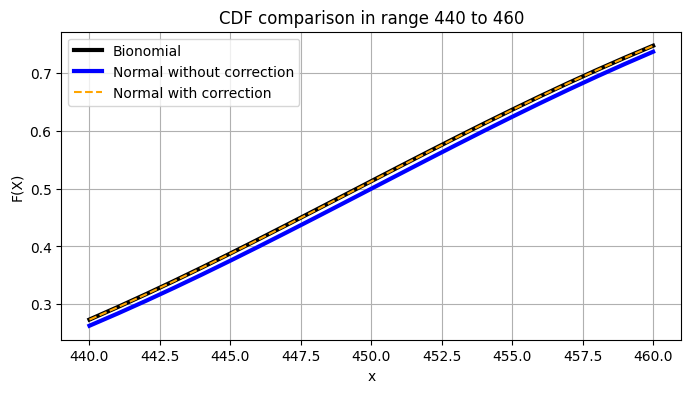

In [16]:
lower_bound = 440 
upper_bound = 460
cdf_range = np.arange(lower_bound, upper_bound + 1)

plt.figure(figsize=(8, 4))
plt.plot(cdf_range, bionomial_CDFs[lower_bound: upper_bound + 1],  label="Bionomial",linewidth = 3, color="black")
plt.plot(cdf_range, normal_CDFs[lower_bound: upper_bound + 1 ], label="Normal without correction", linewidth = 3, color="blue")
plt.plot(cdf_range, corrected_normal_CDFs[lower_bound: upper_bound + 1], linestyle="--", label="Normal with correction", color="orange")

plt.title("CDF comparison in range 440 to 460")
plt.xlabel("x")
plt.ylabel("F(X)")
plt.legend()
plt.grid()
plt.show()

CDF plots of Boinomial and Normal with continuity correction are pretty much the same . but CDF plot of Normal without continuity correction has a little bit of deviation from Boinomial CDF

***

to compare timings of calculating CDFs , once based on bionomial calculatoin and another time for normal with continuity correction , two functions that do the opeartions and another two for finding time are defined  

In [17]:
import scipy.stats as stats
import time

def calculate_bionomial_cdf_timings(X_values, n, p):
    bionomial_cdf_timings = []


    for X in X_values:
        start = time.perf_counter()     
        cdf = 0
        for x in range(0, X + 1):
            cdf+=binom.pmf(X, n, p)
        end = time.perf_counter()
        bionomial_cdf_timings.append(end - start)
    return bionomial_cdf_timings



def calculate_corrected_normal_cdf_timings(X_values, mean, std_dev):
    corrected_normal_cdf_timings = []
    
    for X in X_values:
        start = time.perf_counter()
        continuity_correct_X = X + 0.5
        norm.cdf(continuity_correct_X, loc = mean, scale = std_dev)
        end = time.perf_counter()
        corrected_normal_cdf_timings.append(end - start)
    return corrected_normal_cdf_timings    

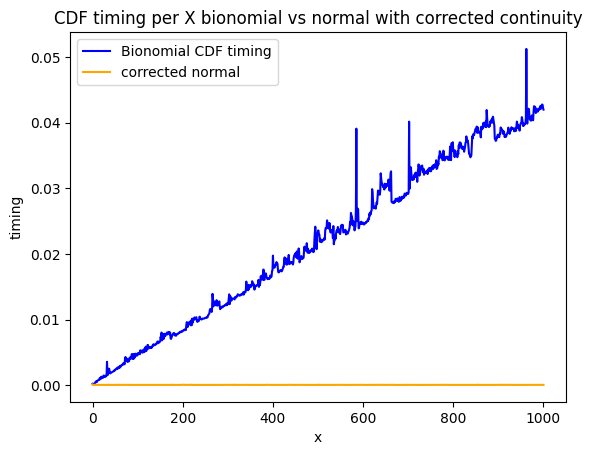

In [18]:
bionomial_cdf_timings = calculate_bionomial_cdf_timings(X_values, n, p)
corrected_normal_cdf_timings = calculate_corrected_normal_cdf_timings(X_values, mean , std_dev)

plt.title("CDF timing per X bionomial vs normal with corrected continuity")
plt.plot(X_values, bionomial_cdf_timings, label="Bionomial CDF timing", color="blue")
plt.plot(X_values, corrected_normal_cdf_timings, label="corrected normal", color="orange")

plt.xlabel("x")
plt.ylabel("timing")
plt.legend()

plt.show()

it is obvious that calculating CDF in Bionomial in a discerte and naive way would take longer that using its normal approximation but also we can see how timing for calculaitng CDF for every posible X is pretty much the same and around zero and but Bionomial CDF timing is an increasing almost linear function ans as X becomes greater , timing to calculate its CDF also takes longer

In [43]:

bionomial_cdf_timings = calculate_bionomial_cdf_timings(X_values, n, p)
corrected_normal_cdf_timings = calculate_corrected_normal_cdf_timings(X_values, mean, std_dev)

bionomial_cdf_values = calculate_bionomial_cdf_timings(X_values, n, p)
result = calculate_normal_cdfs(X_values, mean, std_dev)
corrected_normal_cdf_values = result[1]  # Ensure this is the right element of the tuple

increased_time = np.abs(np.array(bionomial_cdf_timings) - np.array(corrected_normal_cdf_timings))
increased_error = np.abs(np.array(corrected_normal_cdf_values) - np.array(bionomial_cdf_values))

In [47]:
def cost_calculator(increased_time, increased_error):
    for x in X_values[400:601]:
        if (100 * increased_time[x]) < (np.pow(10, 6) * increased_error[x]):
            return x
    
ans = cost_calculator(increased_time, increased_error)
print(f"the point is: X = {ans}")

the point is: X = 400


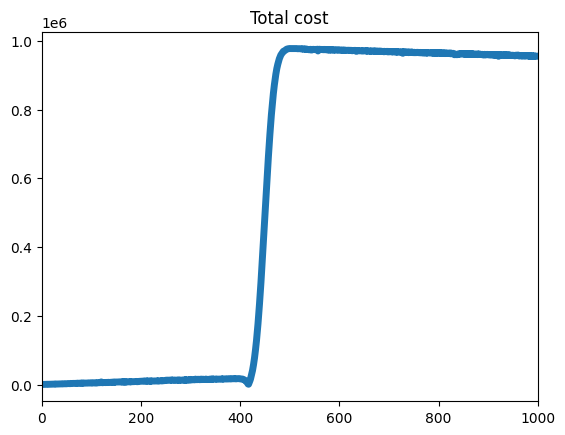

In [45]:
s1 = 100 * increased_time
s2 = np.pow(10, 6) * increased_error
total_cost = np.abs(s1 - s2)


plt.figure()
plt.title("Total cost")
plt.xlim(0, 1000)
plt.plot(X_values, total_cost, linewidth = 5)
plt.show()


so for all values of X between 400 to 600 it is only effinet to use Bionomal for X values less or euqal than 402  
$X = \{400, 401, 402\} $ ----> Effient to choose Bionomial calculation to normal approxmiation  
for all $X > 402$ -----> Effient to choose Normal approximation over Bionomial 

Clearly choosing to calculate $X = 430$ using bionomial in first part was not effient becuase it is bigger than $X = 402$

Q3:

we know about exponential distrubuation the following  
$ \lambda$: rate of distrubuation  
$$f_T(t) = \lambda e^{-\lambda t}$$ 
exponential random variable commonly is used to model the time between two poisson events and in this problem , timing between two customers visiting the shop is an exmponential random variable

choosing our scale time to be a minue then:
$\lambda : 1min / 15 min = {}1/15$

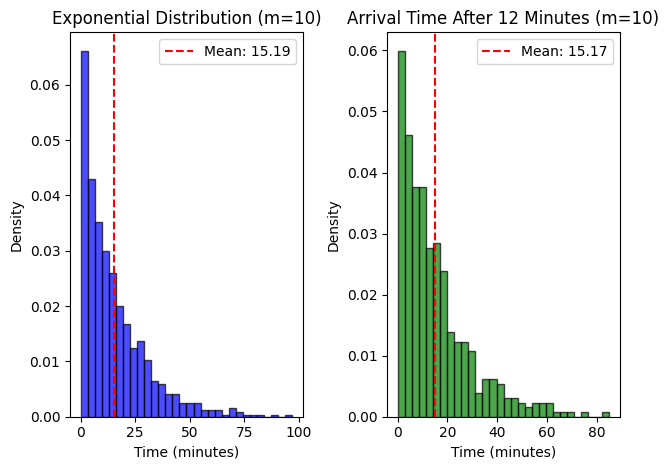

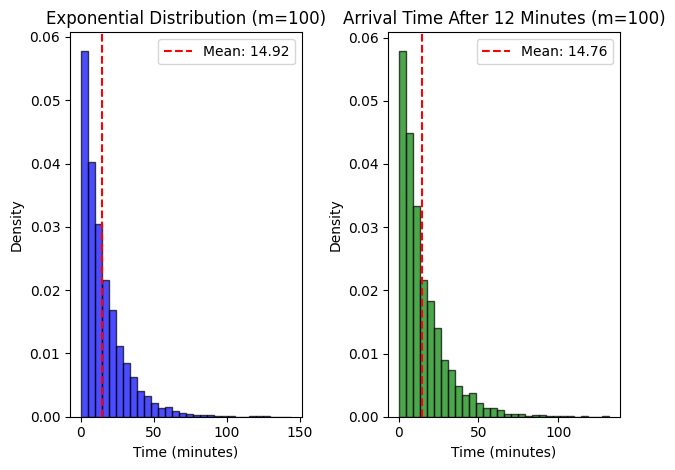

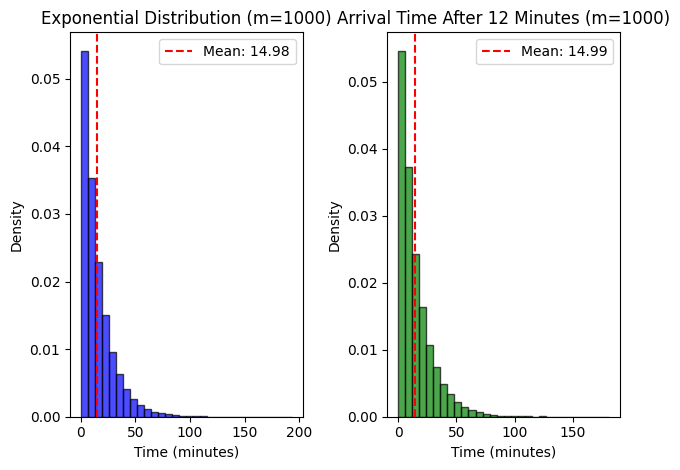

In [22]:

def get_expon_distro(samples, scale = 15):
    exp_pmf = []
    exp_pmf.append(stats.expon.pdf(samples, scale = 15))
    return exp_pmf

def find_samples_with_threshold_intervals(samples, threshold = 12):
    ans = []
    for sample in samples: 
        if  (sample > threshold):
            ans.append(sample - threshold)
    return ans

m_values = [10, 100, 1000]


samples = np.random.exponential(15, m * 100)
mean_samples = np.mean(samples)
samples_above_threshold = find_samples_with_threshold_intervals(samples)
mean_above_threshold = np.mean(samples_above_threshold)



for m in m_values:
    samples = np.random.exponential(15, m * 100)
    mean_samples = np.mean(samples)
    samples_above_threshold = find_samples_with_threshold_intervals(samples)
    mean_above_threshold = np.mean(samples_above_threshold)
    plt.subplot(1, 2, 1)
    plt.hist(samples, bins=30, density=True, color='blue', alpha=0.7, edgecolor='black')
    plt.axvline(mean_samples, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_samples:.2f}')
    plt.title(f'Exponential Distribution (m={m})')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Density')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.hist(samples_above_threshold, bins=30, density=True, color='green', alpha=0.7, edgecolor='black')
    plt.axvline(mean_above_threshold, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_above_threshold:.2f}')
    plt.title(f'Arrival Time After 12 Minutes (m={m})')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()


m is the size or number of our simulated random variables so as it gets bigger the results get better approximation to theoratical results and in thrid condition meaning $m = 3$ both graphs on with exponential distrubuation and the one with arrival time after 12 Minutes distrubuation are simillar which means that there is absoulutly no differnece for that 12 minutes that has been passed for the right graph.  
our parter's claim is totally false.

***

Exponential distrubution memoryless property is expressed mathematically:
$$P(X > t + s | X > s) = P(X > t)$$

so from theoretical point of view: 
$$P(12 < X < 15) = F_X(15) - F_X(12)$$


for Empirical values we have : 

In [23]:
from scipy.stats import expon
m = 1000
samples_number = 100 * m
samples = np.random.exponential(15, samples_number)
filtered_samples = samples[(samples > 12) & (samples < 15)]
Empirical_probablity = len(filtered_samples)/len(samples)

print("Empirical probablity: ")
print(Empirical_probablity)
print("theoretical probablity: ")
theoretical_prob = expon.cdf(15, scale = 15) - expon.cdf(12, scale = 15)
print(theoretical_prob)

Empirical probablity: 
0.08016
theoretical probablity: 
0.08144952294577923


Q4:

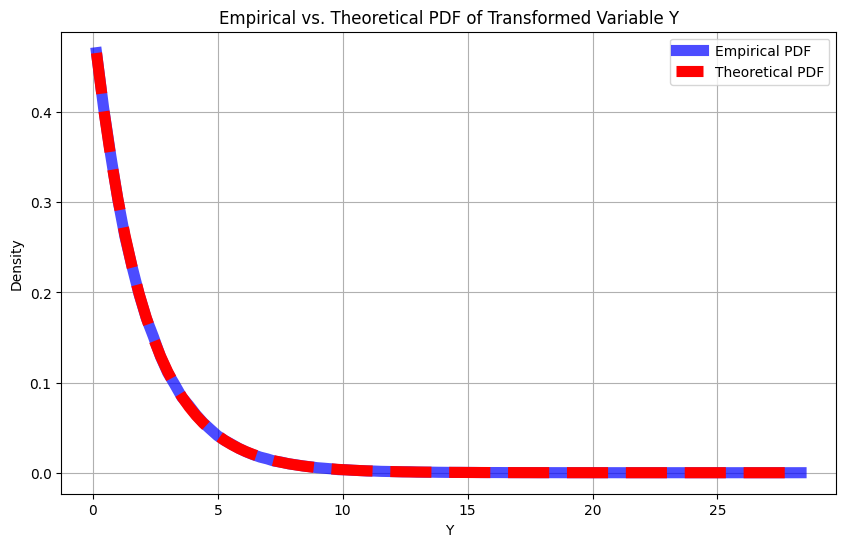

In [24]:

samples = np.random.uniform(0, 1, int(1e6))
def Y(X):
    return -2 * np.log(X)

transformed_samples = Y(samples)

hist, bin_edges = np.histogram(transformed_samples, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  


lambda_ = 1 / 2
theoretical_pdf = expon.pdf(bin_centers, scale=1 / lambda_)  
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, hist, label="Empirical PDF", color="blue", alpha=0.7, linewidth=8) 
plt.plot(bin_centers, theoretical_pdf, label="Theoretical PDF", color="red", linestyle="--", linewidth=8) 
plt.xlabel("Y")
plt.ylabel("Density")
plt.title("Empirical vs. Theoretical PDF of Transformed Variable Y")
plt.legend()
plt.grid(True)
plt.show()



Box-Muller transform :  

Let $U_1, U_2 \sim U(0, 1)$
$$Z_1 = \sqrt{(-2 \ln(U_1))} \cdot cos(2 \pi U_2)$$
$$Z_2 = \sqrt{(-2 \ln(U_1))} \cdot sin(2 \pi U_2)$$

in which $Z_1$ and $Z_2$ are random variables with standard normal distrubtion



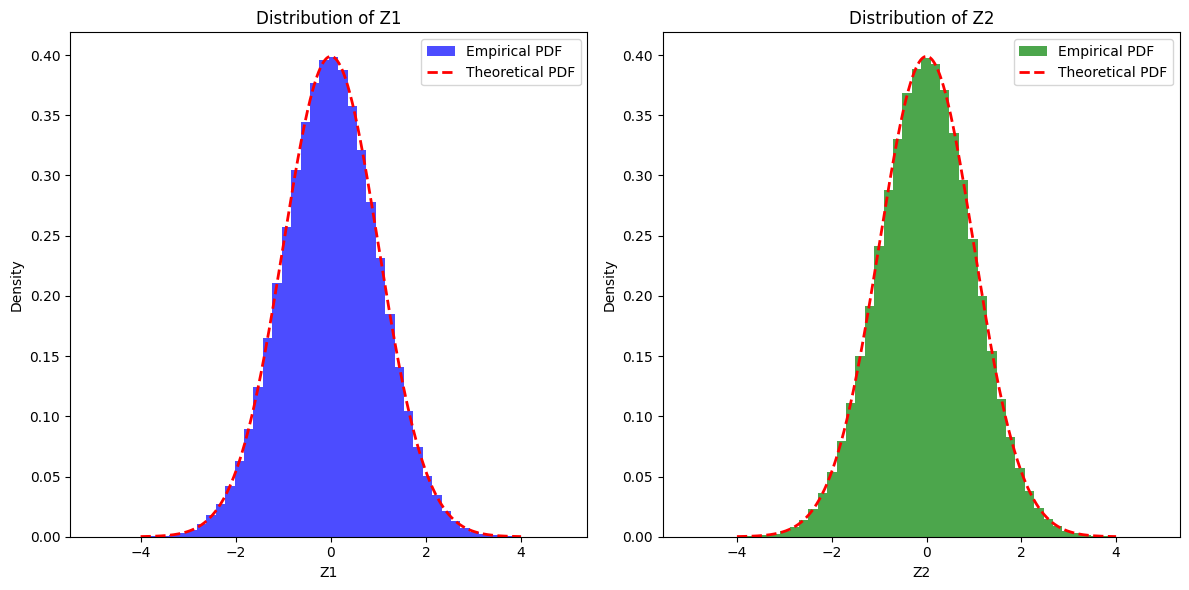

Mean of Z1: 0.0002, Variance of Z1: 0.9989
Mean of Z2: 0.0002, Variance of Z2: 0.9985


In [25]:



import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate uniform random variables
samples = int(1e6)  # 10^6 samples
U1 = np.random.uniform(0, 1, samples)
U2 = np.random.uniform(0, 1, samples)

# Step 2: Transform to polar coordinates
R = np.sqrt(-2 * np.log(U1))
Theta = 2 * np.pi * U2

# Step 3: Generate Z1 and Z2
Z1 = R * np.cos(Theta)
Z2 = R * np.sin(Theta)

# Step 4: Plot the distributions of Z1 and Z2
plt.figure(figsize=(12, 6))

# Histogram of Z1
plt.subplot(1, 2, 1)
plt.hist(Z1, bins=50, density=True, alpha=0.7, color='blue', label='Empirical PDF')
x = np.linspace(-4, 4, 1000)
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, pdf, color='red', linestyle='--', linewidth=2, label='Theoretical PDF')
plt.title('Distribution of Z1')
plt.xlabel('Z1')
plt.ylabel('Density')
plt.legend()

# Histogram of Z2
plt.subplot(1, 2, 2)
plt.hist(Z2, bins=50, density=True, alpha=0.7, color='green', label='Empirical PDF')
plt.plot(x, pdf, color='red', linestyle='--', linewidth=2, label='Theoretical PDF')
plt.title('Distribution of Z2')
plt.xlabel('Z2')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Compare means and variances
mean_Z1, var_Z1 = np.mean(Z1), np.var(Z1)
mean_Z2, var_Z2 = np.mean(Z2), np.var(Z2)

print(f"Mean of Z1: {mean_Z1:.4f}, Variance of Z1: {var_Z1:.4f}")
print(f"Mean of Z2: {mean_Z2:.4f}, Variance of Z2: {var_Z2:.4f}")


